### Importing required libraries

In [5]:
# from jupyterthemes import get_themes
# from jupyterthemes.stylefx import set_nb_theme
# set_nb_theme('gruvboxd')

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.pandas.set_option('display.max_columns', None)
sns.set(style="darkgrid")
%matplotlib inline

### Data import

In [7]:
taxi_jan_2024 = pd.read_parquet('DATA/yellow_tripdata_2024-01.parquet')
taxi_df = pd.concat([taxi_jan_2024])

### Data Exploration

In [8]:
display(taxi_df.head())
print(f'Shape of dataset : {taxi_df.shape}')
print(f'The total number of rows : {taxi_df.shape[0]}')
print(f'The total number of columns : {taxi_df.shape[1]}')

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2024-01-01 00:57:55   2024-01-01 01:17:43              1.0   
1         1  2024-01-01 00:03:00   2024-01-01 00:09:36              1.0   
2         1  2024-01-01 00:17:06   2024-01-01 00:35:01              1.0   
3         1  2024-01-01 00:36:38   2024-01-01 00:44:56              1.0   
4         1  2024-01-01 00:46:51   2024-01-01 00:52:57              1.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           1.72         1.0                  N           186            79   
1           1.80         1.0                  N           140           236   
2           4.70         1.0                  N           236            79   
3           1.40         1.0                  N            79           211   
4           0.80         1.0                  N           211           148   

   payment_type  fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
0             2         17.7    1.0      0.5        0.00           0.0   
1             1         10.0    3.5      0.5        3.75           0.0   
2             1         23.3    3.5      0.5        3.00           0.0   
3             1         10.0    3.5      0.5        2.00           0.0   
4             1          7.9    3.5      0.5        3.20           0.0   

   improvement_surcharge  total_amount  congestion_surcharge  Airport_fee  
0                    1.0         22.70                   2.5          0.0  
1                    1.0         18.75                   2.5          0.0  
2                    1.0         31.30                   2.5          0.0  
3                    1.0         17.00                   2.5          0.0  
4                    1.0         16.10                   2.5          0.0

Shape of dataset : (2964624, 19)
The total number of rows : 2964624
The total number of columns : 19


In [9]:
taxi_df.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'Airport_fee'],
      dtype='object')

## Feature selection
#### picking only the required attributes for further analysis

In [10]:
taxi_df = taxi_df[['tpep_pickup_datetime', 'tpep_dropoff_datetime', 'passenger_count', 
                  'trip_distance', 'RatecodeID', 'PULocationID', 'DOLocationID', 
                  'payment_type', 'total_amount'  ]]

In [11]:
taxi_df.head()

tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  trip_distance  \
0  2024-01-01 00:57:55   2024-01-01 01:17:43              1.0           1.72   
1  2024-01-01 00:03:00   2024-01-01 00:09:36              1.0           1.80   
2  2024-01-01 00:17:06   2024-01-01 00:35:01              1.0           4.70   
3  2024-01-01 00:36:38   2024-01-01 00:44:56              1.0           1.40   
4  2024-01-01 00:46:51   2024-01-01 00:52:57              1.0           0.80   

   RatecodeID  PULocationID  DOLocationID  payment_type  total_amount  
0         1.0           186            79             2         22.70  
1         1.0           140           236             1         18.75  
2         1.0           236            79             1         31.30  
3         1.0            79           211             1         17.00  
4         1.0           211           148             1         16.10

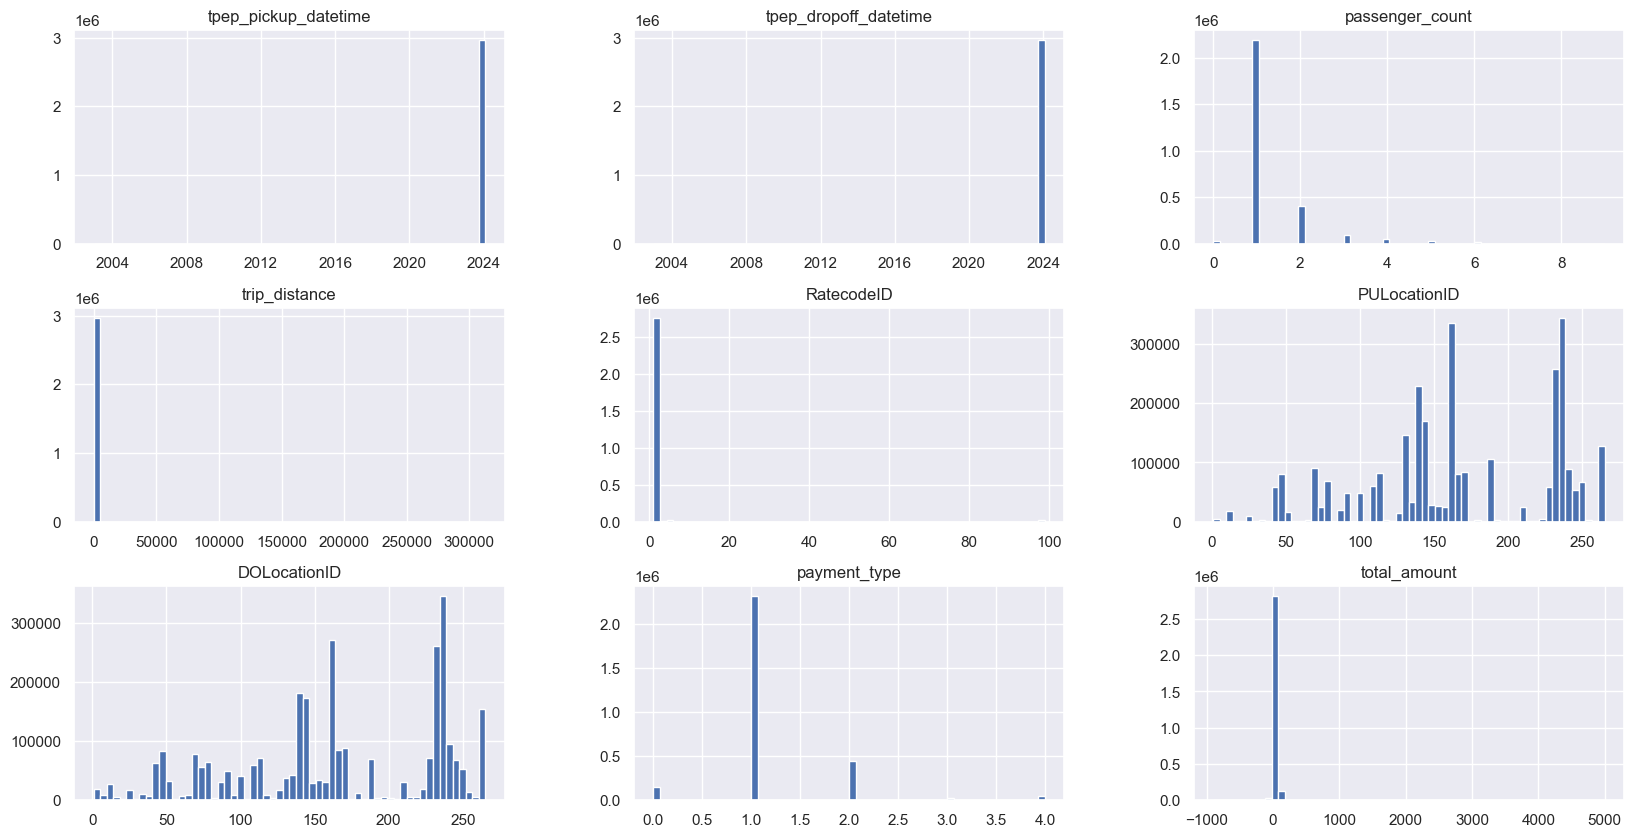

In [12]:
taxi_df.hist(figsize=(20, 10), bins=60)
plt.show()

### total_amount analysis

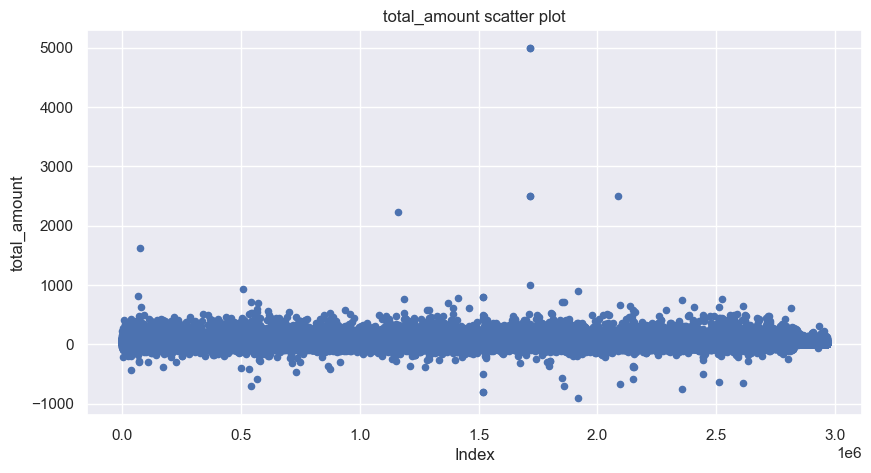

In [13]:
taxi_df.reset_index().plot(kind='scatter', y='total_amount', x='index', figsize=(10, 5))
plt.title('total_amount scatter plot')
plt.xlabel('Index')
plt.ylabel('total_amount')
plt.show()

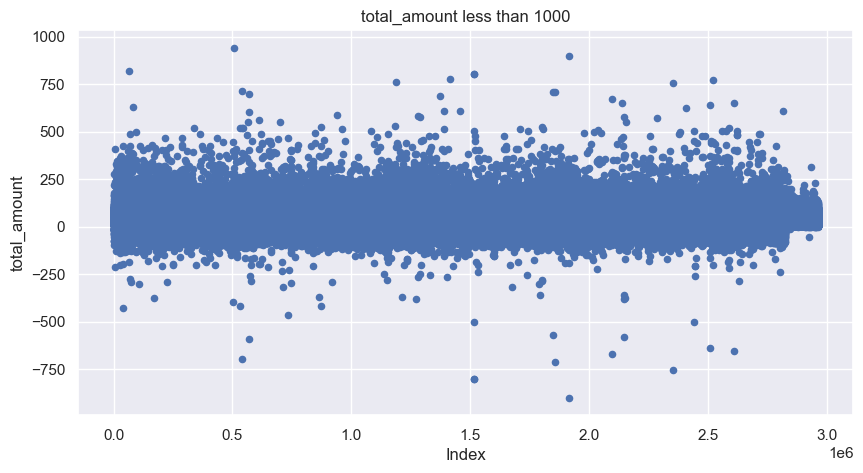

In [14]:
taxi_df[taxi_df['total_amount']<1000].reset_index().plot(kind='scatter', y='total_amount', x='index', figsize=(10, 5))
plt.title('total_amount less than 1000')
plt.xlabel('Index')
plt.ylabel('total_amount')
plt.show()

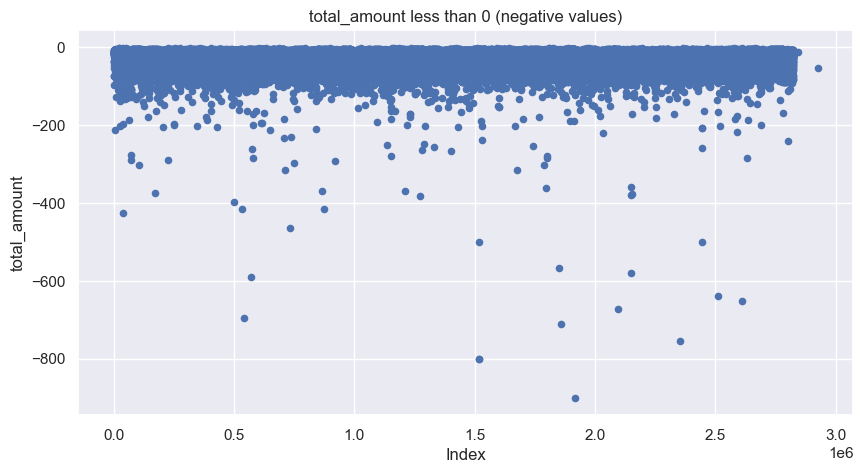

In [15]:
taxi_df[taxi_df['total_amount']<0].reset_index().plot(kind='scatter', y='total_amount', x='index', figsize=(10, 5))
plt.title('total_amount less than 0 (negative values)')
plt.xlabel('Index')
plt.ylabel('total_amount')
plt.show()

In [16]:
print('Total number of negative values : {}'.format(sum(taxi_df['total_amount']<0)))

Total number of negative values : 35504


In [17]:
taxi_df[taxi_df['total_amount']<0]['payment_type'].value_counts()

payment_type
4    21406
2     8326
3     5741
1       29
0        2
Name: count, dtype: int64

### total_amount less than zero vs trip_distance

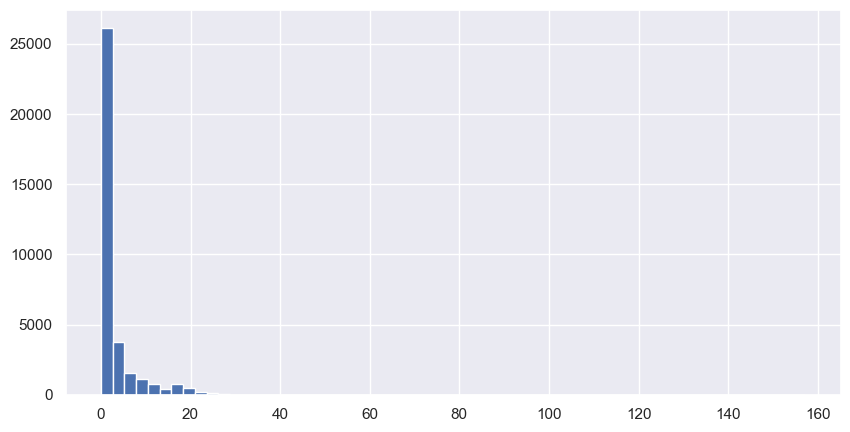

In [18]:
taxi_df[taxi_df['total_amount']<0]['trip_distance'].hist(bins=60, figsize=(10, 5))
plt.show()

In [19]:
print(taxi_df[taxi_df['total_amount']==0].shape)

(416, 9)


In [20]:
taxi_df[taxi_df['total_amount']==0]['payment_type'].value_counts()

payment_type
1    129
4    128
3     83
2     65
0     11
Name: count, dtype: int64

<Axes: >

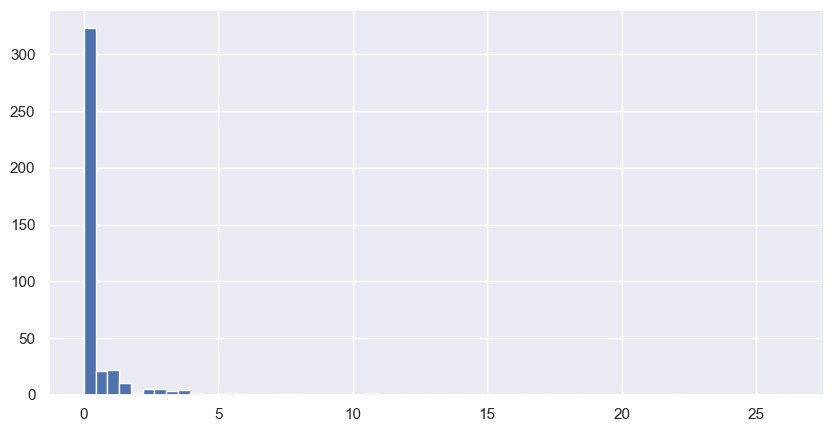

In [21]:
taxi_df[taxi_df['total_amount']==0]['trip_distance'].hist(bins=60, figsize=(10, 5))

In [22]:
taxi_df[taxi_df['total_amount']==0]['trip_distance'].value_counts()

trip_distance
0.00     287
0.10      21
0.20       8
0.90       8
0.50       7
1.60       6
1.00       5
0.80       5
0.70       5
1.10       4
0.30       4
1.30       4
0.60       4
0.40       3
3.00       3
2.50       3
2.40       2
3.40       2
3.80       2
1.80       2
1.70       2
10.70      2
12.10      1
25.10      1
1.40       1
12.80      1
1.74       1
2.70       1
18.40      1
15.00      1
5.30       1
3.30       1
2.90       1
17.10      1
4.20       1
3.50       1
4.00       1
21.90      1
16.50      1
26.20      1
13.60      1
7.70       1
3.60       1
5.50       1
5.80       1
4.90       1
8.10       1
1.20       1
7.00       1
Name: count, dtype: int64

In [23]:
print(taxi_df[taxi_df['total_amount']>200].shape)

(2005, 9)


In [24]:
taxi_df['total_amount'].mean()

26.801504770925415

### Observations & Inference
1. around 35504 data has negative values for total_amount
2. 416 data has total_amount as zero
3. average 27 dollars taxi fare is collected
4. can remove these data where total_amount == 0 
5. we can agree to cut from $200

#### better to get rid of negative values, if not can confuse the model / cause bias

## Data Cleaning

In [25]:
taxi_data_filtered = taxi_df[(taxi_df['total_amount']>0)&(taxi_df['total_amount']<200)]

In [26]:
print(taxi_df.shape)
print("filtered data shape : ", taxi_data_filtered.shape)

(2964624, 9)
filtered data shape :  (2926691, 9)


In [27]:
## handling dates

In [28]:
taxi_data_prep = taxi_data_filtered.copy()

In [29]:
taxi_data_prep.head()

tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  trip_distance  \
0  2024-01-01 00:57:55   2024-01-01 01:17:43              1.0           1.72   
1  2024-01-01 00:03:00   2024-01-01 00:09:36              1.0           1.80   
2  2024-01-01 00:17:06   2024-01-01 00:35:01              1.0           4.70   
3  2024-01-01 00:36:38   2024-01-01 00:44:56              1.0           1.40   
4  2024-01-01 00:46:51   2024-01-01 00:52:57              1.0           0.80   

   RatecodeID  PULocationID  DOLocationID  payment_type  total_amount  
0         1.0           186            79             2         22.70  
1         1.0           140           236             1         18.75  
2         1.0           236            79             1         31.30  
3         1.0            79           211             1         17.00  
4         1.0           211           148             1         16.10

In [30]:
taxi_data_prep['transaction_date'] = pd.to_datetime(taxi_data_prep['tpep_pickup_datetime'].dt.date)

#we make it datetime again because its very little use when its just a string (cant compare , sort, etc)

taxi_data_prep['transaction_year'] =  taxi_data_prep['tpep_pickup_datetime'].dt.year
taxi_data_prep['transaction_month'] = taxi_data_prep['tpep_pickup_datetime'].dt.month
taxi_data_prep['transaction_day'] = taxi_data_prep['tpep_pickup_datetime'].dt.day
taxi_data_prep['transaction_hour'] = taxi_data_prep['tpep_pickup_datetime'].dt.hour

In [31]:
taxi_data_prep.head()

tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  trip_distance  \
0  2024-01-01 00:57:55   2024-01-01 01:17:43              1.0           1.72   
1  2024-01-01 00:03:00   2024-01-01 00:09:36              1.0           1.80   
2  2024-01-01 00:17:06   2024-01-01 00:35:01              1.0           4.70   
3  2024-01-01 00:36:38   2024-01-01 00:44:56              1.0           1.40   
4  2024-01-01 00:46:51   2024-01-01 00:52:57              1.0           0.80   

   RatecodeID  PULocationID  DOLocationID  payment_type  total_amount  \
0         1.0           186            79             2         22.70   
1         1.0           140           236             1         18.75   
2         1.0           236            79             1         31.30   
3         1.0            79           211             1         17.00   
4         1.0           211           148             1         16.10   

  transaction_date  transaction_year  transaction_month  transaction_day  \
0       2024-01-01              2024                  1                1   
1       2024-01-01              2024                  1                1   
2       2024-01-01              2024                  1                1   
3       2024-01-01              2024                  1                1   
4       2024-01-01              2024                  1                1   

   transaction_hour  
0                 0  
1                 0  
2                 0  
3                 0  
4                 0

In [32]:
taxi_data_prep['transaction_year'].value_counts()
# will have to consider only the data from 2024 and discard the rest

transaction_year
2024    2926677
2023         10
2009          3
2002          1
Name: count, dtype: int64

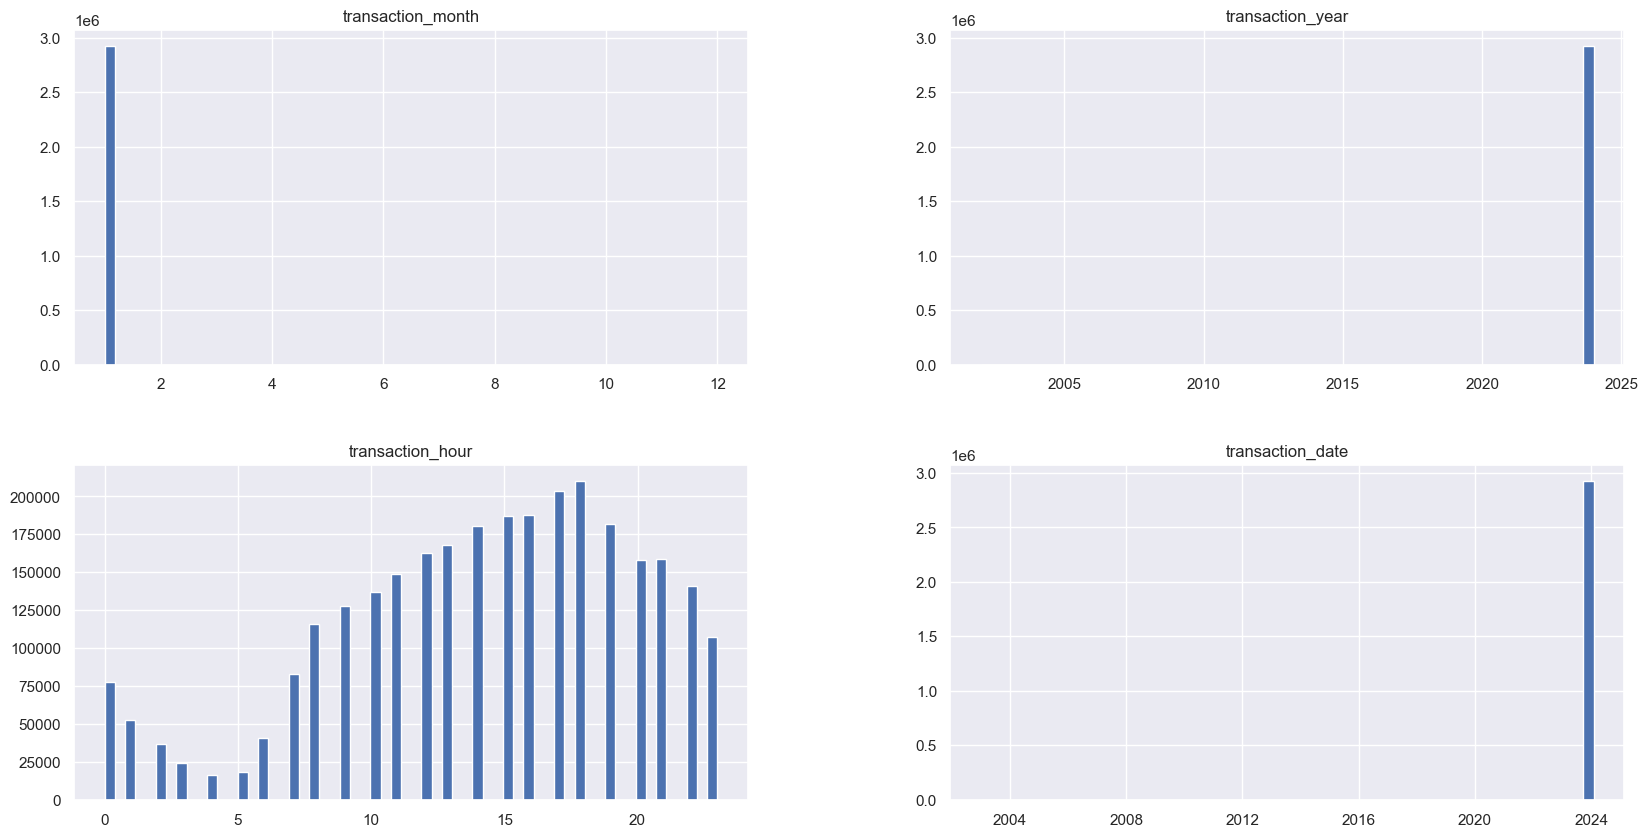

In [33]:
taxi_data_prep[[ 'transaction_month', 'transaction_year', 'transaction_hour', 'transaction_date']].hist(figsize=(20, 10), bins=60)
plt.show()

In [34]:
# lets filter the data for year 2024 and for month jan only

In [35]:
taxi_data_prep = taxi_data_prep[taxi_data_prep['transaction_year'] == 2024]
taxi_data_prep = taxi_data_prep[taxi_data_prep['transaction_month'] == 1]

In [36]:
taxi_data_prep['transaction_year'].value_counts()

transaction_year
2024    2926674
Name: count, dtype: int64

In [37]:
taxi_data_prep['transaction_month'].value_counts()

transaction_month
1    2926674
Name: count, dtype: int64

In [38]:
# Trip Distance

In [39]:
sum(taxi_data_prep['trip_distance'] == 0)

56422

In [40]:
taxi_data_prep[(taxi_data_prep['trip_distance'] == 0) & (taxi_data_prep['total_amount'] > 20)]

tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
199      2024-01-01 00:39:34   2024-01-01 01:04:02              1.0   
251      2024-01-01 00:18:26   2024-01-01 00:52:40              1.0   
1388     2024-01-01 00:59:23   2024-01-01 00:59:27              1.0   
1468     2024-01-01 00:45:06   2024-01-01 00:45:22              1.0   
1863     2024-01-01 00:34:49   2024-01-01 01:10:54              2.0   
...                      ...                   ...              ...   
2964376  2024-01-31 22:09:50   2024-01-31 22:26:08              NaN   
2964483  2024-01-31 22:23:49   2024-01-31 22:47:22              NaN   
2964514  2024-01-31 22:05:33   2024-01-31 22:20:30              NaN   
2964516  2024-01-31 22:22:27   2024-01-31 22:43:21              NaN   
2964528  2024-01-31 22:24:07   2024-01-31 22:36:32              NaN   

         trip_distance  RatecodeID  PULocationID  DOLocationID  payment_type  \
199                0.0         1.0           161           264             1   
251                0.0        99.0           222           147             1   
1388               0.0         2.0           107           107             2   
1468               0.0         5.0           231           231             1   
1863               0.0         1.0           264           264             1   
...                ...         ...           ...           ...           ...   
2964376            0.0         NaN            97           113             0   
2964483            0.0         NaN            48            41             0   
2964514            0.0         NaN           114           246             0   
2964516            0.0         NaN           163           243             0   
2964528            0.0         NaN           140           239             0   

         total_amount transaction_date  transaction_year  transaction_month  \
199             26.80       2024-01-01              2024                  1   
251             60.94       2024-01-01              2024                  1   
1388            74.00       2024-01-01              2024                  1   
1468            40.20       2024-01-01              2024                  1   
1863            40.62       2024-01-01              2024                  1   
...               ...              ...               ...                ...   
2964376         21.72       2024-01-31              2024                  1   
2964483         27.83       2024-01-31              2024                  1   
2964514         20.23       2024-01-31              2024                  1   
2964516         33.13       2024-01-31              2024                  1   
2964528         23.85       2024-01-31              2024                  1   

         transaction_day  transaction_hour  
199                    1                 0  
251                    1                 0  
1388                   1                 0  
1468                   1                 0  
1863                   1                 0  
...                  ...               ...  
2964376               31                22  
2964483               31                22  
2964514               31                22  
2964516               31                22  
2964528               31                22  

[30194 rows x 14 columns]

In [41]:
# feature extraction - trip_duration

In [42]:
from ydata_profiling import ProfileReport
data_profile = ProfileReport(taxi_df, title='taxi_report')
data_profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]